# Создание дашборда  взаимодействия пользователей с карточками ЯндексДзен


Бизнес-задача: анализ взаимодействия пользователей с карточками Яндекс.Дзен;

Насколько часто предполагается пользоваться дашбордом: не реже, чем раз в неделю;

Кто будет основным пользователем дашборда: менеджеры по анализу контента;

Состав данных для дашборда:

- история событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
- разбивка событий по темам источников;
- таблица соответствия тем источников темам карточек;

По каким параметрам данные должны группироваться:
- дата и время;
- тема карточки;
- тема источника;
- возрастная группа;

Характер данных:
- история событий по темам карточек — абсолютные величины с разбивкой по минутам;
- разбивка событий по темам источников — относительные величины (% событий);
- соответствие тем источников темам карточек - абсолютные величины;

Важность: все графики имеют равную важность;

Источники данных для дашборда: cырые данные о событиях взаимодействия пользователей с карточками (таблица log_raw);

База данных, в которой будут храниться агрегированные данные: дополнительные агрегированные таблицы в БД zen;

Частота обновления данных: один раз в сутки, в полночь по UTC;

Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда):

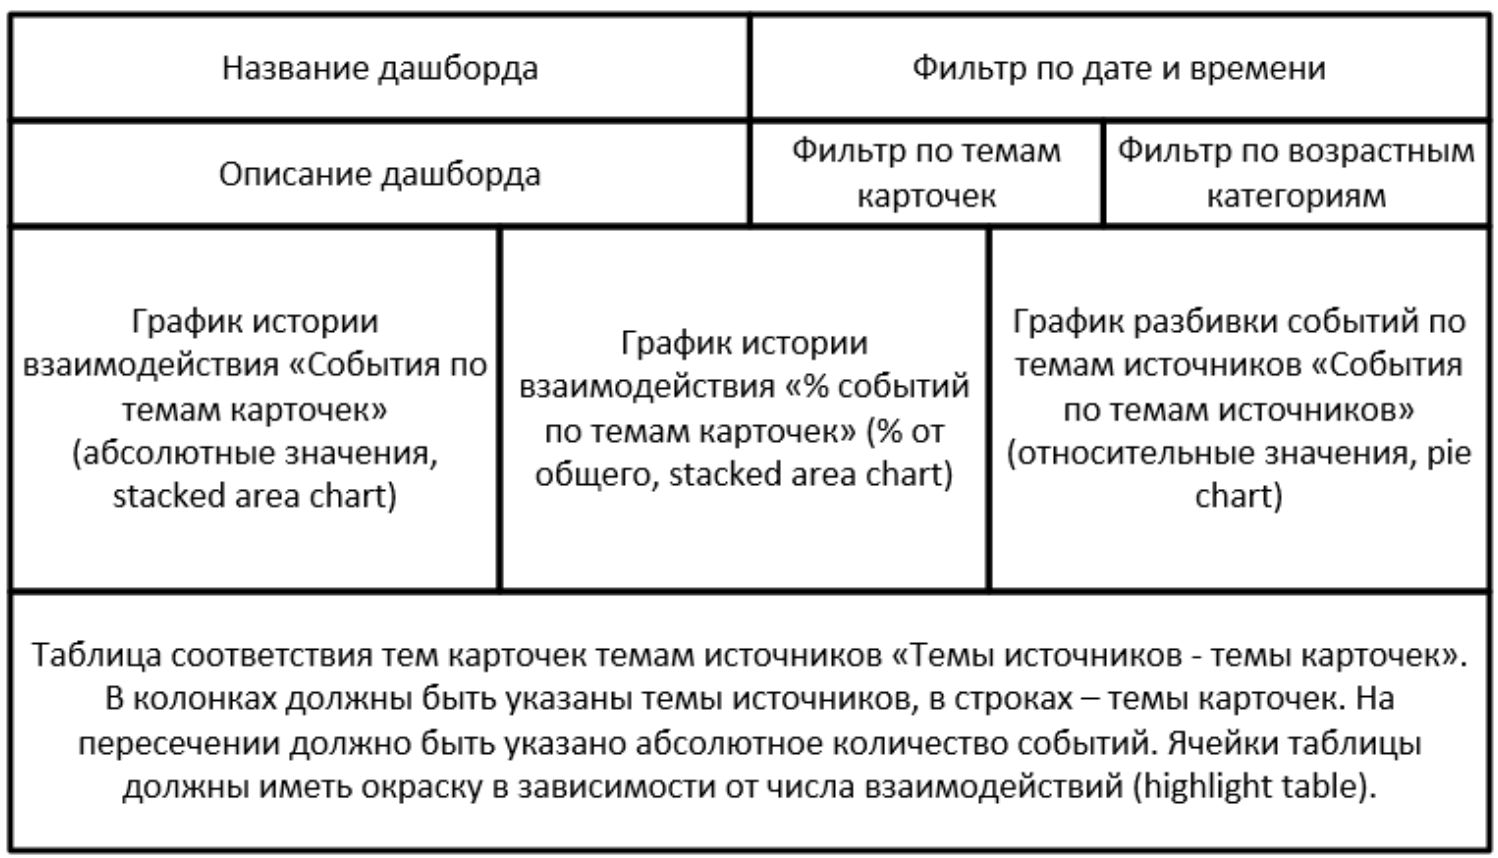

In [1]:
# pip install psycopg2  выполнить установку psycopg2
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

# определяем параметры подключения к базе данных и создаётся самоподключение:
db_config = {'user': 'praktikum_student', # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, # порт подключения
             'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string) 

In [2]:
# запрос к базе данных для того, чтобы получить все записи из таблицы 
query = '''
           SELECT *
           FROM dash_visits
        '''
 
dash_visits = pd.io.sql.read_sql(query, con=engine)
# выгружаем в файл
dash_visits.to_csv('dash_visits.csv', index=False)
 
dash_visits.head(5)

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


In [3]:
dash_visits.dt.max()

Timestamp('2019-09-24 19:00:00')

In [4]:
dash_visits.dt.min()

Timestamp('2019-09-24 18:28:00')